In [5]:
import pandas as pd
df = pd.read_csv('/content/Electric Vehicle Sales by State in India.csv')
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [6]:
df.shape

(29749, 8)

In [7]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29749 entries, 0 to 29748
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               29749 non-null  float64
 1   Month_Name         29749 non-null  object 
 2   Date               29748 non-null  object 
 3   State              29748 non-null  object 
 4   Vehicle_Class      29748 non-null  object 
 5   Vehicle_Category   29748 non-null  object 
 6   Vehicle_Type       29748 non-null  object 
 7   EV_Sales_Quantity  29748 non-null  float64
dtypes: float64(2), object(6)
memory usage: 1.8+ MB


In [9]:
 # Convert Year to integer
df['Year'] = df['Year'].astype(int)

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Replace null EV sales with 0
df['EV_Sales_Quantity'] = df['EV_Sales_Quantity'].fillna(0)

df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0


In [10]:
valid_ev_types = ['2W_Personal', '3W_Shared', '4W_Personal', '4W_Shared', 'Bus']

df_ev = df[df['Vehicle_Type'].isin(valid_ev_types)]

df_ev.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0
13,2014,jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1.0
14,2014,jan,2014-01-01,Andhra Pradesh,MOTOR CAB,4-Wheelers,4W_Shared,0.0
15,2014,jan,2014-01-01,Andhra Pradesh,MOTOR CAR,4-Wheelers,4W_Personal,0.0
16,2014,jan,2014-01-01,Andhra Pradesh,OMNI BUS,Bus,Bus,0.0


In [11]:
# State-wise total EV sales
state_sales = df_ev.groupby('State')['EV_Sales_Quantity'].sum().reset_index()

# Sort from highest to lowest
state_sales = state_sales.sort_values(by='EV_Sales_Quantity', ascending=False)

state_sales

,State,EV_Sales_Quantity
19,Maharashtra,99854.0
15,Karnataka,76063.0
29,Tamil Nadu,54396.0
10,Gujarat,38638.0
16,Kerala,35809.0
27,Rajasthan,34263.0
8,Delhi,28699.0
31,Uttar Pradesh,25956.0
1,Andhra Pradesh,22240.0
24,Odisha,19043.0


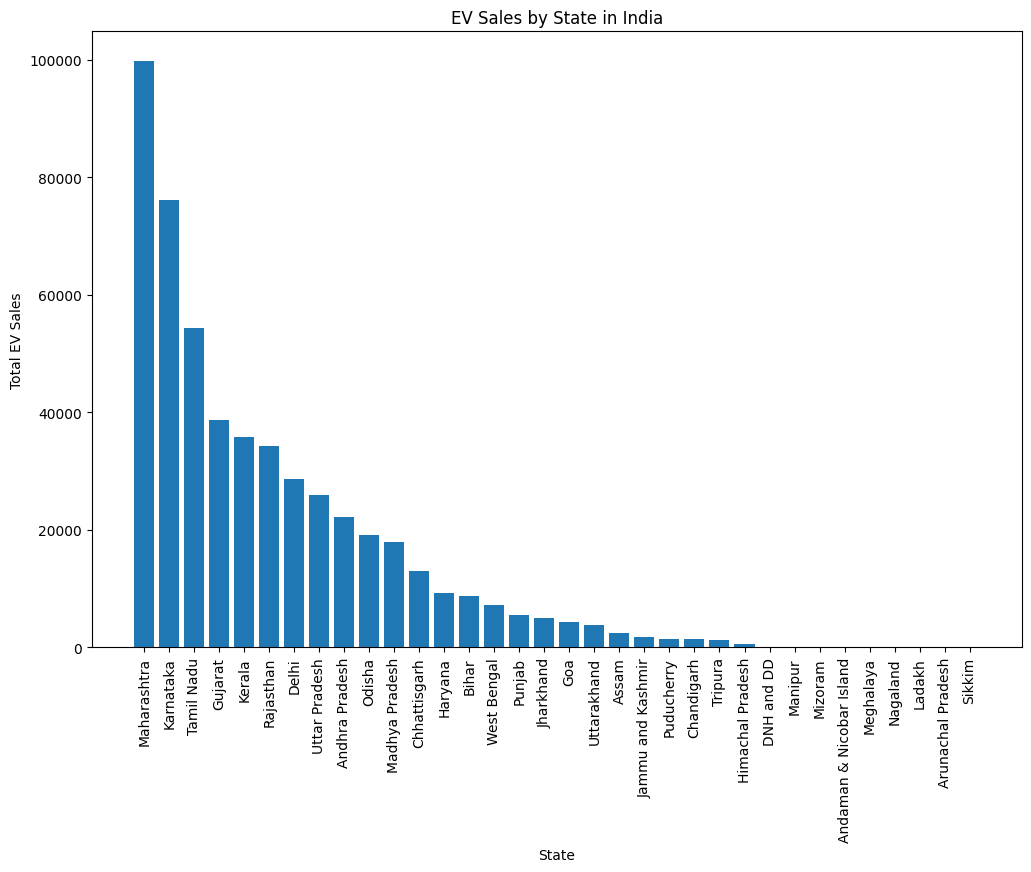

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(state_sales['State'], state_sales['EV_Sales_Quantity'])
plt.xticks(rotation=90)
plt.title('EV Sales by State in India')
plt.xlabel('State')
plt.ylabel('Total EV Sales')
plt.show()

In [13]:
yearly_sales = df_ev.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()

yearly_sales

,Year,EV_Sales_Quantity
0,2014,788.0
1,2015,692.0
2,2016,1131.0
3,2017,983.0
4,2018,2062.0
5,2019,13434.0
6,2020,9117.0
7,2021,26472.0
8,2022,128799.0
9,2023,239228.0


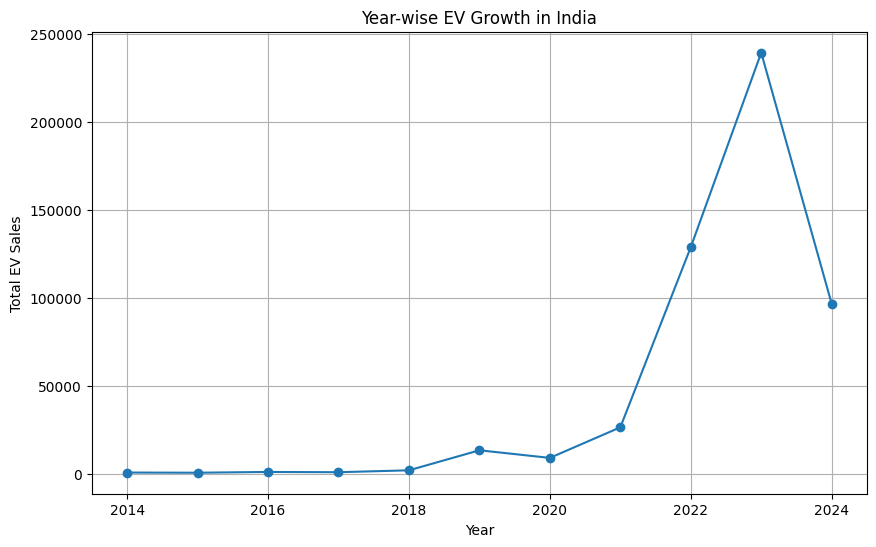

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['EV_Sales_Quantity'], marker='o')
plt.title('Year-wise EV Growth in India')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.show()

In [15]:
type_sales = df_ev.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().reset_index()

type_sales

,Vehicle_Type,EV_Sales_Quantity
0,2W_Personal,463331.0
1,3W_Shared,16190.0
2,4W_Personal,32338.0
3,4W_Shared,5803.0
4,Bus,1671.0


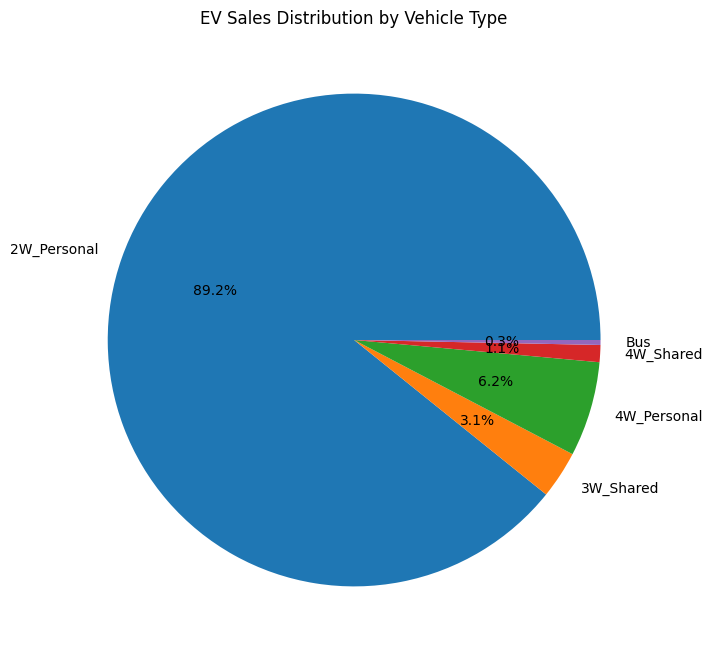

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(type_sales['EV_Sales_Quantity'], labels=type_sales['Vehicle_Type'], autopct='%1.1f%%')
plt.title('EV Sales Distribution by Vehicle Type')
plt.show()

In [17]:
# Top 5 states with highest EV sales
top5_states = state_sales.head(5)
top5_states

,State,EV_Sales_Quantity
19,Maharashtra,99854.0
15,Karnataka,76063.0
29,Tamil Nadu,54396.0
10,Gujarat,38638.0
16,Kerala,35809.0


In [18]:
# Bottom 5 states with lowest EV sales
bottom5_states = state_sales.tail(5)
bottom5_states

,State,EV_Sales_Quantity
21,Meghalaya,40.0
23,Nagaland,37.0
17,Ladakh,21.0
2,Arunachal Pradesh,11.0
28,Sikkim,1.0


In [19]:
print("INSIGHTS:")
print("-----------------------------------")
print("1. State with highest EV sales: ", top5_states.iloc[0]['State'])
print("2. State with lowest EV sales: ", bottom5_states.iloc[0]['State'])

print("\n3. Strong EV adoption states generally include:")
print("- Karnataka")
print("- Maharashtra")
print("- Delhi")
print("- Tamil Nadu")

print("\n4. EV sales have increased significantly year over year.")
print("5. 2W and 3W vehicles contribute the majority of EV sales.")
print("6. States with low sales show scope for government policy improvements.")

INSIGHTS:
-----------------------------------
1. State with highest EV sales:  Maharashtra
2. State with lowest EV sales:  Meghalaya

3. Strong EV adoption states generally include:
- Karnataka
- Maharashtra
- Delhi
- Tamil Nadu

4. EV sales have increased significantly year over year.
5. 2W and 3W vehicles contribute the majority of EV sales.
6. States with low sales show scope for government policy improvements.


In [20]:
df_ev.to_csv('Cleaned_EV_Sales_Data.csv', index=False)

In [21]:
 import sqlite3
import pandas as pd

# Load cleaned data
df_sql = pd.read_csv('Cleaned_EV_Sales_Data.csv')

# Create SQLite DB in memory
conn = sqlite3.connect(":memory:")

# Load dataframe into a SQL table
df_sql.to_sql("evsales", conn, index=False, if_exists='replace')

print("SQL Database ready!")

SQL Database ready!


In [22]:
query1 = """
SELECT State, SUM(EV_Sales_Quantity) AS Total_EV_Sales
FROM evsales
GROUP BY State
ORDER BY Total_EV_Sales DESC;
"""
pd.read_sql(query1, conn)

,State,Total_EV_Sales
0,Maharashtra,99854.0
1,Karnataka,76063.0
2,Tamil Nadu,54396.0
3,Gujarat,38638.0
4,Kerala,35809.0
5,Rajasthan,34263.0
6,Delhi,28699.0
7,Uttar Pradesh,25956.0
8,Andhra Pradesh,22240.0
9,Odisha,19043.0


In [23]:
query2 = """
SELECT Year, SUM(EV_Sales_Quantity) AS Yearly_EV_Sales
FROM evsales
GROUP BY Year
ORDER BY Year;
"""
pd.read_sql(query2, conn)

,Year,Yearly_EV_Sales
0,2014,788.0
1,2015,692.0
2,2016,1131.0
3,2017,983.0
4,2018,2062.0
5,2019,13434.0
6,2020,9117.0
7,2021,26472.0
8,2022,128799.0
9,2023,239228.0


In [24]:
query3 = """
SELECT Vehicle_Type, SUM(EV_Sales_Quantity) AS Total_Sales
FROM evsales
GROUP BY Vehicle_Type
ORDER BY Total_Sales DESC;
"""
pd.read_sql(query3, conn)

,Vehicle_Type,Total_Sales
0,2W_Personal,463331.0
1,4W_Personal,32338.0
2,3W_Shared,16190.0
3,4W_Shared,5803.0
4,Bus,1671.0


In [25]:
query4 = """
SELECT State, SUM(EV_Sales_Quantity) AS Total_EV_Sales
FROM evsales
GROUP BY State
ORDER BY Total_EV_Sales DESC
LIMIT 5;
"""
pd.read_sql(query4, conn)

,State,Total_EV_Sales
0,Maharashtra,99854.0
1,Karnataka,76063.0
2,Tamil Nadu,54396.0
3,Gujarat,38638.0
4,Kerala,35809.0


In [26]:
query5 = """
SELECT State, SUM(EV_Sales_Quantity) AS Total_EV_Sales
FROM evsales
GROUP BY State
ORDER BY Total_EV_Sales ASC
LIMIT 5;
"""
pd.read_sql(query5, conn)

,State,Total_EV_Sales
0,Sikkim,1.0
1,Arunachal Pradesh,11.0
2,Ladakh,21.0
3,Nagaland,37.0
4,Meghalaya,40.0


In [27]:
conn.close()